# Observations for the night March 11th 2021 with red filter

https://harvard.zoom.us/rec/play/N7umVF8Rk3vWvW_O3jkaTinofB2WxW3QKz0fVai_K-qvAYLt37uMrvskOlnBiMEjduSeQVzWT7_DDYzc.IY7Pqjef82YlWmZE?continueMode=true&_x_zm_rtaid=BjQYrDaETYeYRUMw8NQgLw.1613559822570.c813d210d38e378b719cb4048493df5b&_x_zm_rhtaid=205


- work with wl_2021_10
- use jupyter kernel LSST
- requires the installation https://github.com/mfisherlevine/summit
- requires to write in file {HOME}/notebooks/.user_setups




In [51]:
#!/bin/sh
# This file is expected to be found in ${HOME}/notebooks/.user_setups
#  It is a shell fragment that will be sourced during kernel startup
#  when the LSST kernel is started in a JupyterLab environment.  It runs
#  in the user context and can contain arbitrary shell code.  Exported changes
#  in its environment will persist into the JupyterLab Python environment.

#    setup -j rapid_analysis -r ${HOME}/repos/rapid_analysis
#    setup -j atmospec       -r ${HOME}/repos/atmospec

In [52]:
! eups list -s

Spectractor           LOCAL:/home/dagoret/repos/w_2021_10/Spectractor 	setup
afw                   21.0.0-20-g09baf175d+e1e7d1c708 	current w_2021_10 setup
alert_packet          master-gbd80f2fea6 	current w_2021_10 setup
ap_association        21.0.0-6-gd3e26fa+20a6c0bac9 	current w_2021_10 setup
ap_pipe               21.0.0-10-gf688641+b6798eb8cf 	current w_2021_10 setup
ap_verify             21.0.0-10-ga0af1fc+919a499e71 	current w_2021_10 setup
astro_metadata_translator 0.1.0-22-g86269e8+6691386486 	current w_2021_10 setup
astshim               21.0.0-2-g45278ab+9f51b1e3f7 	current w_2021_10 setup
atmospec              LOCAL:/home/dagoret/repos/w_2021_10/atmospec 	setup
base                  21.0.0-6-g2d4f3f3+9f51b1e3f7 	current w_2021_10 setup
cbp                   21.0.0-2-g143869c+a9f57e981a 	current w_2021_10 setup
coadd_utils           21.0.0-2-g7f82c8f+2c5dd3b4f0 	current w_2021_10 setup
cp_pipe               21.0.0-10-gcf60f90+c974c5881c 	current w_2021_10 setup
ctrl_bps     

In [53]:
# correct for bug in stack in wl_2021_02
%config IPCompleter.use_jedi=False

# Import

In [54]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.io import fits

In [55]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend("lsst.display.firefly")

## CONFIGURATION

In [56]:
FLAG_SAVE_IMAGE=True

# Logbook with rapid analysis

In [57]:
from lsst.rapid.analysis.nightReport import NightReporter
repoDir='/project/shared/auxTel'
reporter=NightReporter(repoDir,"2021-03-11")

Loaded data for seqNums 1 to 429


In [58]:
reporter.getObservedObjects()

['HD 102870',
 'HR 3439',
 'HD 164461',
 'HD 78866',
 'HD72514',
 'HD 75519',
 'HD 125371',
 'HD 72514']

/home/dagoret/repos/w_2021_10/rapid_analysis/python/lsst/rapid/analysis/nightReport.py:135: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111, polar=True)


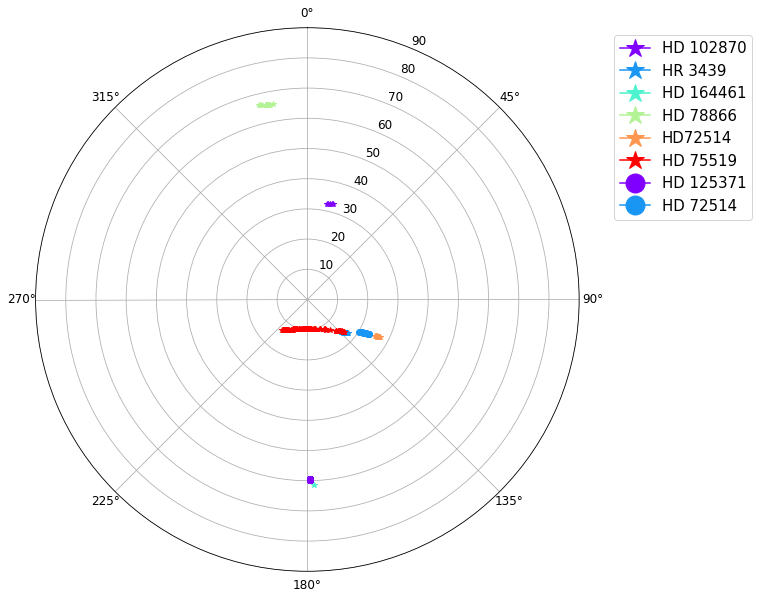

In [59]:
reporter.makePolarPlotForObjects()

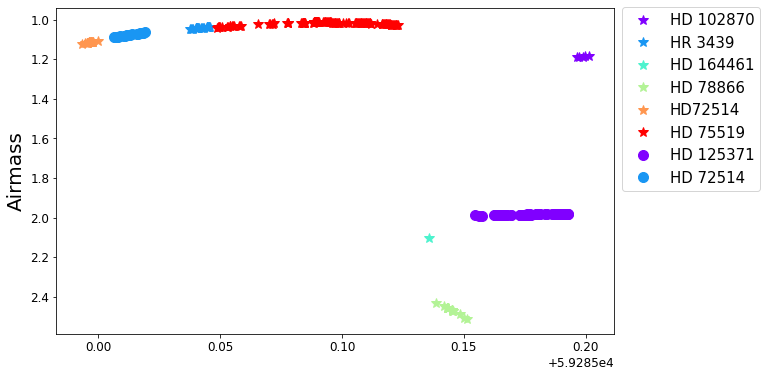

In [60]:
reporter.plotPerObjectAirMass()

In [61]:
reporter.printObsTable()

{seqNum:4} {imageType:9} {obj:10} {timeOfDay} {filt:25} {dt.sec:6.1f}  {expTime:2.2f}
   1 bias      Park position 22:18:36.876 RG610~empty                  0.0  0.00
   2 bias      Park position 22:19:11.261 RG610~empty                 34.4  0.00
   3 bias      Park position 22:19:15.778 RG610~empty                  4.5  0.00
   4 bias      Park position 22:19:20.269 RG610~empty                  4.5  0.00
   5 bias      Park position 22:19:24.770 RG610~empty                  4.5  0.00
   6 bias      Park position 22:19:29.264 RG610~empty                  4.5  0.00
   7 bias      Park position 22:19:33.763 RG610~empty                  4.5  0.00
   8 bias      Park position 22:19:38.262 RG610~empty                  4.5  0.00
   9 bias      Park position 22:19:42.758 RG610~empty                  4.5  0.00
  10 bias      Park position 22:19:47.253 RG610~empty                  4.5  0.00
  11 bias      Park position 22:19:51.746 RG610~empty                  4.5  0.00
  12 bias      Park pos

# Butler

In [62]:
butler=dafPersist.Butler("/project/shared/auxTel")

In [63]:
dayObs="2021-03-11"

# Configuration

In [64]:
#CONFIG 1 
#191 science   HD 75519   01:23:46.224 RG610~holo4_003            193.2  5.00
#192 science   HD 75519   01:24:21.169 RG610~holo4_003             34.9  5.00
#193 science   HD 75519   01:24:42.413 RG610~holo4_003             21.2  5.00

In [65]:
#CONFIG 2
#283 science   HD 75519   02:45:25.087 RG610~holo4_003            235.9  5.00
#284 science   HD 75519   02:47:31.346 RG610~holo4_003            126.3  25.00
#285 science   HD 75519   02:48:00.283 RG610~holo4_003             28.9  25.00
# 286 science   HD 75519   02:48:29.927 RG610~holo4_003             29.6  25.00
# 287 science   HD 75519   02:48:58.831 RG610~holo4_003             28.9  25.00
# 288 science   HD 75519   02:49:27.942 RG610~holo4_003             29.1  25.00
# 289 science   HD 75519   02:49:57.673 RG610~holo4_003             29.7  25.00
# 290 science   HD 75519   02:50:27.091 RG610~holo4_003             29.4  25.00
# 291 science   HD 75519   02:50:56.136 RG610~holo4_003             29.0  25.00
# 292 science   HD 75519   02:51:25.196 RG610~holo4_003             29.1  25.00
# 293 science   HD 75519   02:51:54.248 RG610~holo4_003             29.1  25.00
# 294 science   HD 75519   02:52:23.352 RG610~holo4_003             29.1  25.00
# 295 science   HD 75519   02:52:52.463 RG610~holo4_003             29.1  25.00
# 296 science   HD 75519   02:53:21.563 RG610~holo4_003             29.1  25.00
# 297 science   HD 75519   02:53:51.050 RG610~holo4_003             29.5  25.00
# 298 science   HD 75519   02:54:20.571 RG610~holo4_003             29.5  25.00
# 299 science   HD 75519   02:54:49.518 RG610~holo4_003             28.9  25.00
# 300 science   HD 75519   02:55:18.628 RG610~holo4_003             29.1  25.00
# 301 science   HD 75519   02:55:47.723 RG610~holo4_003             29.1  25.00
# 302 science   HD 75519   02:56:17.274 RG610~holo4_003             29.6  25.00
# 303 science   HD 75519   02:56:46.922 RG610~holo4_003             29.6  25.00

In [66]:
#CONFIG 3
#165 science   HR 3439    01:01:30.478 RG610~holo4_003            101.6  0.50
#166 science   HR 3439    01:02:00.570 RG610~holo4_003             30.1  0.50
# 167 science   HR 3439    01:02:28.770 RG610~holo4_003             28.2  0.50

In [67]:
#CONFIG 4
#188 science   HD 75519   01:19:36.315 RG610~ronchi170lpmm         70.0  5.00
# 189 science   HD 75519   01:20:18.220 RG610~ronchi170lpmm         41.9  5.00
# 190 science   HD 75519   01:20:33.072 RG610~ronchi170lpmm         14.9  5.00

In [68]:
# CONGIG 5
#200 science   HD 75519   01:52:19.566 RG610~ronchi170lpmm        460.0  5.00
# 201 science   HD 75519   01:52:28.549 RG610~ronchi170lpmm          9.0  5.00
# 202 science   HD 75519   01:52:38.095 RG610~ronchi170lpmm          9.5  5.00
# 203 science   HD 75519   01:52:47.124 RG610~ronchi170lpmm          9.0  5.00
# 204 science   HD 75519   02:00:08.356 RG610~ronchi170lpmm        441.2  5.00
# 205 science   HD 75519   02:01:03.092 RG610~ronchi170lpmm         54.7  5.00

# 279 science   HD 75519   02:40:01.877 RG610~ronchi170lpmm         29.1  25.00
# 280 science   HD 75519   02:40:31.045 RG610~ronchi170lpmm         29.2  25.00
# 281 science   HD 75519   02:41:00.031 RG610~ronchi170lpmm         29.0  25.00
# 282 science   HD 75519   02:41:29.145 RG610~ronchi170lpmm         29.1  25.00

In [144]:
CONFIG=5

if CONFIG==1:
    imageName="HD75519"
    filt="RG610"
    disperserName="holo4_003"
    all_myseq=range(191,194)
elif CONFIG==2:
    imageName="HD75519"
    filt="RG610"
    disperserName="holo4_003"
    all_myseq=range(283,305)
elif CONFIG==3:
    imageName="HR3439"
    filt="RG610"
    disperserName="holo4_003"
    all_myseq=range(165,168)
elif CONFIG==4:
    imageName="HD75519"
    filt="RG610"
    disperserName="ronchi170lpmm"
    all_myseq=range(188,191)
elif CONFIG==5:
    imageName="HD75519"
    filt="RG610"
    disperserName="ronchi170lpmm"
    all_myseq=range(200,283)
    

In [145]:
seqNum=all_myseq[0]

# Display

In [146]:
display1=afwDisplay.getDisplay(frame=1,port=80,name='sylviedc_debug1_2021_03_11',url=os.environ["FIREFLY_URL"])

In [147]:
raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)

In [148]:
display1.mtv(raw)

In [149]:
display1.getClient().display_url()

# Meta Query to the Butler

In [150]:
print(butler.queryMetadata('raw','seqNum',dayObs=dayObs))

[1, 2, 3, 5, 6, 4, 11, 10, 8, 14, 9, 7, 12, 13, 19, 17, 16, 23, 15, 21, 24, 20, 18, 22, 25, 34, 33, 28, 26, 31, 27, 29, 35, 30, 32, 36, 40, 44, 38, 42, 43, 37, 45, 39, 41, 50, 51, 48, 47, 46, 49, 56, 60, 55, 53, 59, 57, 58, 54, 52, 61, 62, 66, 65, 63, 64, 70, 71, 69, 67, 68, 80, 76, 78, 73, 75, 74, 72, 77, 79, 81, 87, 89, 83, 82, 84, 90, 88, 86, 85, 94, 95, 93, 91, 92, 101, 103, 102, 99, 97, 96, 104, 105, 98, 100, 106, 107, 110, 109, 111, 108, 112, 113, 114, 115, 116, 117, 118, 120, 119, 121, 122, 124, 123, 126, 125, 127, 128, 129, 131, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 201, 203, 204, 205, 206, 207, 208, 209, 210, 212, 211, 214, 213, 215, 216, 217, 218, 223, 222, 219, 22

In [151]:
seqNums=butler.queryMetadata('raw','seqNum',dayObs=dayObs)

In [152]:
%config IPCompleter.use_jedi=False

## Butler Query meta data

In [153]:
#ids=butler.queryMetadata('raw',["dayObs", "seqNum"],object='HD 75519')

In [154]:
#count=0
#for dataid in ids:
#    print(dataid)
#    count+=1
#    if count > 20:
#        break

# Exp 

In [155]:
#exp=butler.get('quickLookExp',dayObs=dayObs,seqNum=seqNum)

In [156]:
#display1.mtv(exp)

In [157]:
#fig=plt.figure(figsize=(20,5))
#ax1=fig.add_subplot(131)
#ax1.imshow(exp.image.array,origin="lower",cmap="jet")
#ax2=fig.add_subplot(132)
#ax2.imshow(exp.mask.array,origin="lower",cmap="jet")
#ax3=fig.add_subplot(133)
#ax3.imshow(exp.variance.array,origin="lower",cmap="jet")

In [158]:
#exp.image.array.shape

In [159]:
#raw.image.array.shape

## Meta Data

In [160]:
md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)

In [161]:
md.toDict()

{'SIMPLE': True,
 'EXTEND': True,
 'COMMENT': ["  FITS (Flexible Image Transport System) format is defined in 'Astronomy",
  "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H",
  "= '        '",
  '---- Date, night and basic image information ----',
  "= '        '",
  '---- Telescope info, location, observer ----',
  "= '        '",
  '---- Pointing info, etc. ----',
  "= '        '",
  '---- TAN Projection ----',
  "= '        '",
  '---- Image-identifying used to build OBS-ID ----',
  "= '        '",
  '---- Test Stand information ----',
  "= '        '",
  '---- Information from Camera (Common block) ----',
  "= '        '",
  '---- Information from Camera ----',
  "= '        '",
  '---- Filter/grating information ----',
  "= '        '",
  '---- Exposure-related information ----',
  "= '        '",
  '---- Weather information ----',
  "= '        '",
  '---- Header information ----',
  "= '        '",
  '---- Checksums ----',
  '---- Information from Camera

# Start to work on raw images with Red filter

In [162]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

In [163]:
len(all_myseq)

83

In [164]:
all_my_raw_array=[]
all_my_header=[]
for seqNum in all_myseq:
    raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)
    md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)
    all_my_raw_array.append(np.copy(raw.image.array))
    all_my_header.append(md.toDict())

In [165]:
Ncol=4
Nrow=6
Ntot=Ncol*Nrow

In [166]:
%matplotlib inline

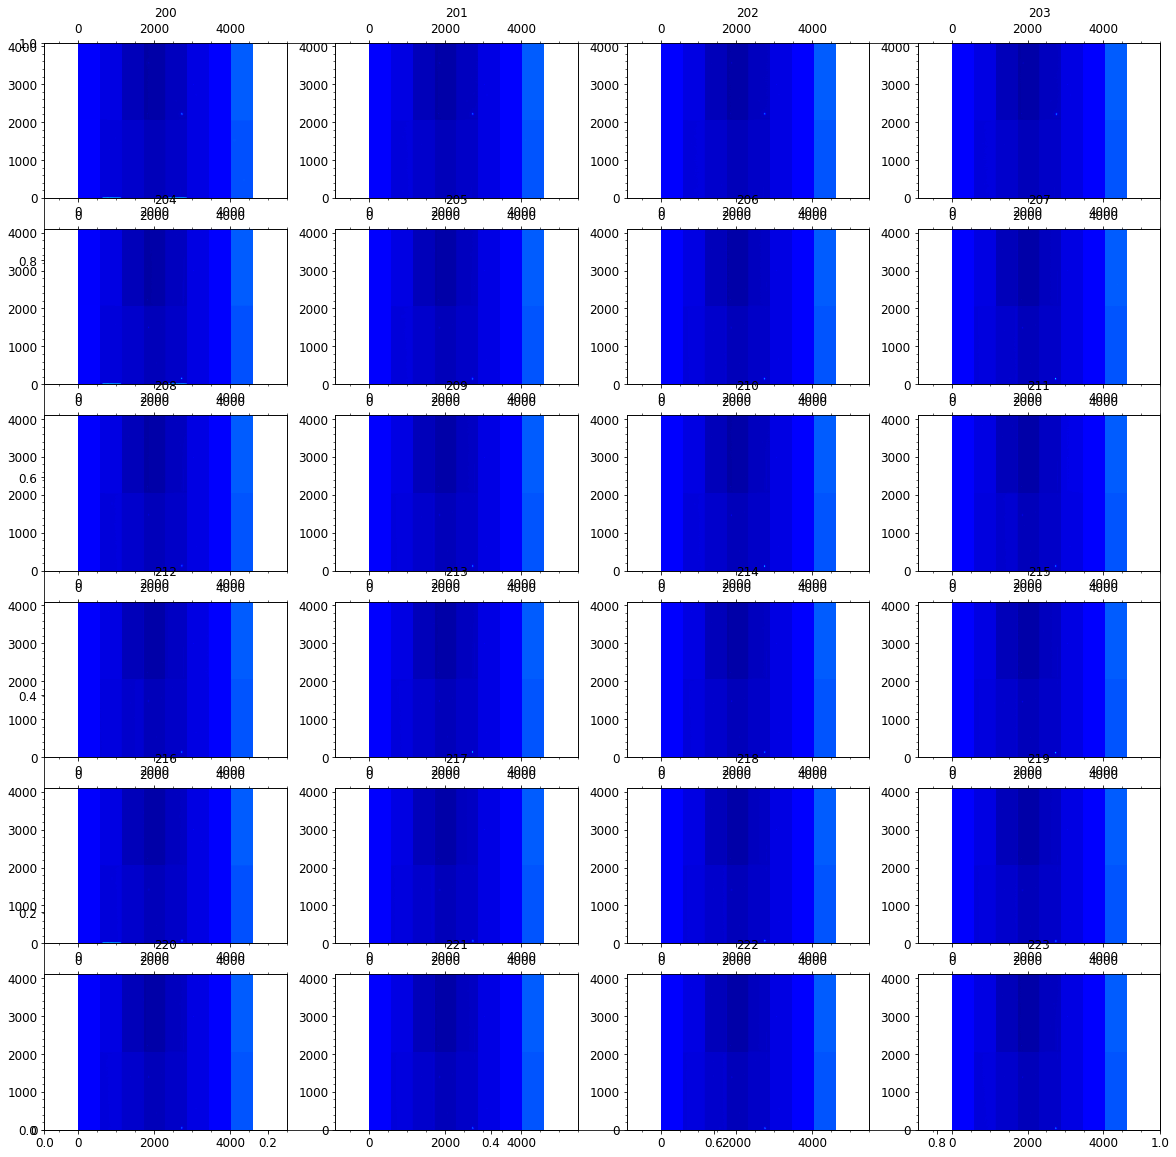

In [167]:
fig = plt.figure(figsize=(20,20))
ax=fig.add_subplot(111)
# loop on angle
for idx in np.arange(Ntot):
    if idx>=len(all_my_raw_array):
        break
    ax=fig.add_subplot(Nrow,Ncol,idx+1)
    ax.imshow(all_my_raw_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    ax.set_title(all_myseq[idx])
    
    ax.minorticks_on()
    
    ax2=ax.twiny()
    ax2.imshow(all_my_raw_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    ax2.set_xlim(ax.get_xlim())
    ax2.minorticks_on()
    
    #ax.tick_params(which='major', length=10, width=2, direction='inout')
    #ax.tick_params(which='minor', length=5, width=2, direction='inout')
    #ax.grid(which='both')



    #ax.set_aspect('equal')

    #x1, x2 = ax.get_xlim() 
    #y1, y2 = ax.get_ylim() 


In [168]:
if FLAG_SAVE_IMAGE:
    idx=0
    for seqNum in all_myseq:
        filename=disperserName+"_"+filt+"_"+imageName+"_"+dayObs+"_"+str(seqNum)+".fits"
        print(filename)
    
        hdr = fits.Header()
    
        for key,value in all_my_header[idx].items():
            hdr[str(key)]=value
        
        hdu = fits.PrimaryHDU(data=all_my_raw_array[idx],header=hdr)  # with headers
        #hdu = fits.PrimaryHDU(data=all_my_raw_array[idx])
    
        hdul = fits.HDUList([hdu])
    
        hdul.writeto(filename,overwrite=True)
    
        idx+=1

ronchi170lpmm_RG610_HD75519_2021-03-11_200.fits
ronchi170lpmm_RG610_HD75519_2021-03-11_201.fits
ronchi170lpmm_RG610_HD75519_2021-03-11_202.fits
ronchi170lpmm_RG610_HD75519_2021-03-11_203.fits
ronchi170lpmm_RG610_HD75519_2021-03-11_204.fits
ronchi170lpmm_RG610_HD75519_2021-03-11_205.fits
ronchi170lpmm_RG610_HD75519_2021-03-11_206.fits
ronchi170lpmm_RG610_HD75519_2021-03-11_207.fits
ronchi170lpmm_RG610_HD75519_2021-03-11_208.fits
ronchi170lpmm_RG610_HD75519_2021-03-11_209.fits
ronchi170lpmm_RG610_HD75519_2021-03-11_210.fits
ronchi170lpmm_RG610_HD75519_2021-03-11_211.fits
ronchi170lpmm_RG610_HD75519_2021-03-11_212.fits
ronchi170lpmm_RG610_HD75519_2021-03-11_213.fits
ronchi170lpmm_RG610_HD75519_2021-03-11_214.fits
ronchi170lpmm_RG610_HD75519_2021-03-11_215.fits
ronchi170lpmm_RG610_HD75519_2021-03-11_216.fits
ronchi170lpmm_RG610_HD75519_2021-03-11_217.fits
ronchi170lpmm_RG610_HD75519_2021-03-11_218.fits
ronchi170lpmm_RG610_HD75519_2021-03-11_219.fits
ronchi170lpmm_RG610_HD75519_2021-03-11_2